In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install ucimlrepo


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, mean_squared_error, r2_score


In [12]:
# Try loading from ucimlrepo first; if not available, load from URL
try:
    from ucimlrepo import fetch_ucirepo

    # Fetch dataset
    student_performance = fetch_ucirepo(id=320)

    # Combine features and target
    X = student_performance.data.features
    y = student_performance.data.targets
    df = pd.concat([X, y], axis=1)
    print("✅ Dataset loaded successfully using ucimlrepo!")

except Exception as e:
    print("⚠️ ucimlrepo failed, loading from URL instead...")
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student-mat.csv"
    df = pd.read_csv(url, sep=';')
    print("✅ Dataset loaded successfully from URL!")

# Display first few rows
df.head()


✅ Dataset loaded successfully using ucimlrepo!


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [14]:
# Display basic dataset info
df.info()

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Basic statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [15]:
# Convert categorical columns into numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

# Handle missing values (if any)
df = df.fillna(df.mean(numeric_only=True))

# Create a new target column: pass_fail (1 = Pass if G3 >= 10 else 0)
df['pass_fail'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

print("✅ Preprocessing completed successfully!")
df.head()


✅ Preprocessing completed successfully!


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass_fail
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,4,0,11,11,1
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,1
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,1
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,1
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,1


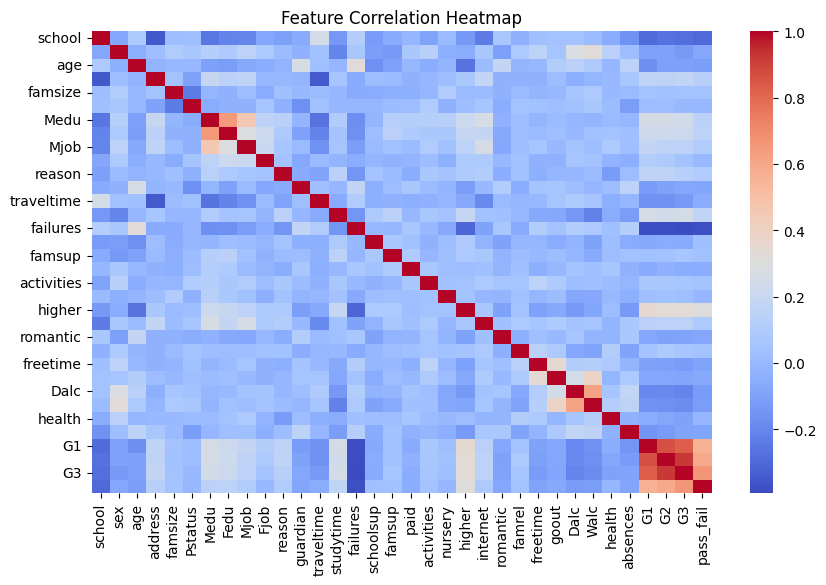

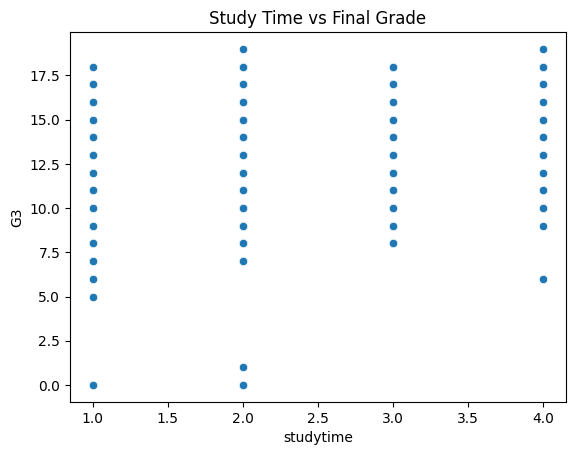

In [16]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Relationship between study time and final grade
sns.scatterplot(x='studytime', y='G3', data=df)
plt.title("Study Time vs Final Grade")
plt.show()


In [17]:
# Select relevant features
X = df[['studytime', 'absences', 'G1', 'G2']]
y_marks = df['G3']          # For regression
y_passfail = df['pass_fail'] # For classification

# Split data into training and testing sets
X_train, X_test, y_train_marks, y_test_marks = train_test_split(X, y_marks, test_size=0.2, random_state=42)
_, _, y_train_pass, y_test_pass = train_test_split(X, y_passfail, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data successfully split and scaled!")


✅ Data successfully split and scaled!


In [18]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_marks)

# Predict on test set
y_pred_marks = lr.predict(X_test_scaled)

# Evaluate model
print("📈 Linear Regression Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test_marks, y_pred_marks))
print("R² Score:", r2_score(y_test_marks, y_pred_marks))


📈 Linear Regression Evaluation:
Mean Squared Error: 1.3720779659573377
R² Score: 0.859298817840107


In [19]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train_pass)

y_pred_pass = log_reg.predict(X_test_scaled)

print("🤖 Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test_pass, y_pred_pass))
print("Precision:", precision_score(y_test_pass, y_pred_pass))
print("Recall:", recall_score(y_test_pass, y_pred_pass))
print("\nClassification Report:\n", classification_report(y_test_pass, y_pred_pass))


🤖 Logistic Regression Evaluation:
Accuracy: 0.9230769230769231
Precision: 0.9565217391304348
Recall: 0.9565217391304348

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.96      0.96      0.96       115

    accuracy                           0.92       130
   macro avg       0.81      0.81      0.81       130
weighted avg       0.92      0.92      0.92       130



In [20]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train_pass)
y_pred_dt = dt.predict(X_test)

print("🌳 Decision Tree Evaluation:")
print("Accuracy:", accuracy_score(y_test_pass, y_pred_dt))
print("Precision:", precision_score(y_test_pass, y_pred_dt))
print("Recall:", recall_score(y_test_pass, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test_pass, y_pred_dt))


🌳 Decision Tree Evaluation:
Accuracy: 0.9076923076923077
Precision: 0.9478260869565217
Recall: 0.9478260869565217

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60        15
           1       0.95      0.95      0.95       115

    accuracy                           0.91       130
   macro avg       0.77      0.77      0.77       130
weighted avg       0.91      0.91      0.91       130



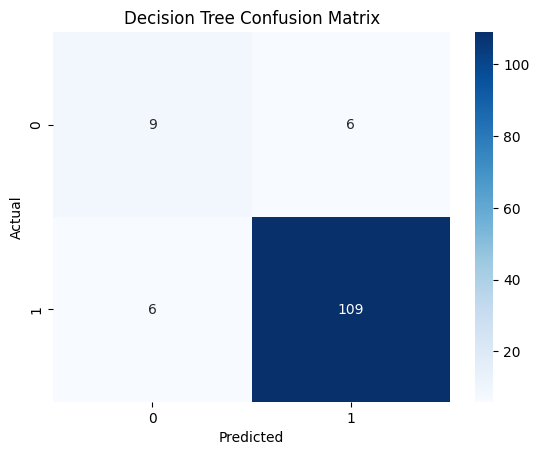

In [21]:
cm = confusion_matrix(y_test_pass, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [22]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test_pass, y_pred_pass),
        accuracy_score(y_test_pass, y_pred_dt)
    ],
    'Precision': [
        precision_score(y_test_pass, y_pred_pass),
        precision_score(y_test_pass, y_pred_dt)
    ],
    'Recall': [
        recall_score(y_test_pass, y_pred_pass),
        recall_score(y_test_pass, y_pred_dt)
    ]
})

print("📊 Model Comparison:")
print(results)


📊 Model Comparison:
                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.923077   0.956522  0.956522
1        Decision Tree  0.907692   0.947826  0.947826


In [23]:
print("✅ Conclusion:")
print("- Linear Regression predicted students’ final marks with decent accuracy.")
print("- Logistic Regression and Decision Tree models classified Pass/Fail effectively.")
print("- Decision Tree slightly outperformed Logistic Regression based on accuracy and recall.")
print("- Study time and previous grades (G1, G2) were key predictors of performance.")


✅ Conclusion:
- Linear Regression predicted students’ final marks with decent accuracy.
- Logistic Regression and Decision Tree models classified Pass/Fail effectively.
- Decision Tree slightly outperformed Logistic Regression based on accuracy and recall.
- Study time and previous grades (G1, G2) were key predictors of performance.
